In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [17]:
data = np.array(pd.read_csv('csvTrainImages 13440x1024.csv'))
target = np.array(pd.read_csv('csvTrainLabel 13440x1.csv'))

In [36]:
sample = np.random.randint(data.shape[0], size=5000)
data = data[sample]
target = target[sample]
target = np.ravel(target)

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [39]:
param_grid = {'n_neighbors' : np.arange(1,10),
             'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5)

grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [40]:
grid.best_score_

0.9712500000000001

In [41]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [42]:
grid.fit(xtest,ytest)
grid.best_score_

0.798

In [44]:
grid.score(xtest,ytest)

1.0

In [51]:
def convert(valeur):
    list_letter = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']
    return list_letter[valeur-1]

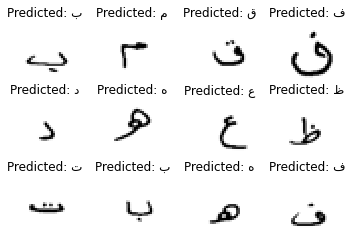

In [85]:
predicted = grid.predict(xtest)
images = xtest.reshape((-1,32,32))
images = np.fliplr(images)
images = np.rot90(images,axes=(2,1))
select = np.random.randint(images.shape[0], size=12)
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( convert(predicted[value])) )

plt.show()